# Import Data

In [2]:
import pandas as pd

df = pd.read_csv('small_mnist.csv')
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df['label'].value_counts()

,count
label,
0,200
1,200
2,200
3,200
4,200
5,200
6,200
7,200
8,200


## Splitting

In [6]:
from sklearn.model_selection import train_test_split

X = df.drop(columns="label").values / 255
y = df["label"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1600, 784), (400, 784), (1600,), (400,))

## Visualisasi Angka random

In [7]:
import matplotlib.pyplot as plt
import numpy as np

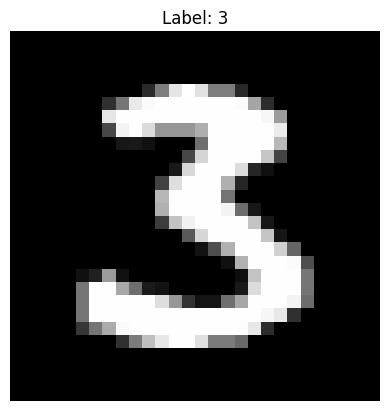

In [10]:
N = len(X_train)
idx = np.random.choice(N)
img, label = X_train[idx], y_train[idx]

plt.imshow(img.reshape(28, 28), cmap='gray')
plt.title(f"Label: {label}")
plt.axis('off')
plt.show()

## Training

In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

In [13]:
pipeline = Pipeline([
    ('algo', RandomForestClassifier(n_jobs=-1, random_state=42))
])

parameter = {
    'algo__n_estimators': [100, 200, 500],
    'algo__criterion': ['gini', 'entropy'],
    'algo__max_depth': [None, 10, 20, 30],
    'algo__min_samples_split': [2, 5, 10],
    'algo__min_samples_leaf': [1, 2, 4],
    'algo__max_features': ['auto', 'sqrt', 'log2'],
    'algo__bootstrap': [True, False],
    'algo__n_jobs': [-1]
}

In [15]:
from sklearn.model_selection import RandomizedSearchCV

model = RandomizedSearchCV(pipeline, param_distributions=parameter, cv=3, scoring='accuracy', n_iter=50, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
48 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py", line 662, in fit
    self._final_estimator.fit(Xt, y, **l

{'algo__n_jobs': -1, 'algo__n_estimators': 500, 'algo__min_samples_split': 5, 'algo__min_samples_leaf': 1, 'algo__max_features': 'log2', 'algo__max_depth': None, 'algo__criterion': 'entropy', 'algo__bootstrap': False}
1.0 0.9162503249924461 0.9425


## Evaluasi model

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test, average='weighted')
recall_test = recall_score(y_test, y_pred_test, average='weighted')
f1_test = f1_score(y_test, y_pred_test, average='weighted')

accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train, average='weighted')
recall_train = recall_score(y_train, y_pred_train, average='weighted')
f1_train = f1_score(y_train, y_pred_train, average='weighted')

print(f"Jumlah data train: {X_train.shape[0]}")
print(f"Jumlah data test: {X_test.shape[0]}\n")

print("**Evaluasi pada Data Train**")
print(f"Akurasi: {accuracy_train:.4f}")
print(f"Precision: {precision_train:.4f}")
print(f"Recall: {recall_train:.4f}")
print(f"F1-Score: {f1_train:.4f}\n")

print("**Evaluasi pada Data Test**")
print(f"Akurasi: {accuracy_test:.4f}")
print(f"Precision: {precision_test:.4f}")
print(f"Recall: {recall_test:.4f}")
print(f"F1-Score: {f1_test:.4f}")

Jumlah data train: 1600
Jumlah data test: 400

**Evaluasi pada Data Train**
Akurasi: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000

**Evaluasi pada Data Test**
Akurasi: 0.9425
Precision: 0.9436
Recall: 0.9425
F1-Score: 0.9426


In [27]:
from sklearn.metrics import classification_report

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("Classification Report - Train Data:")
print(classification_report(y_train, y_train_pred))

print("\nClassification Report - Test Data:")
print(classification_report(y_test, y_test_pred))

Classification Report - Train Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       160
           1       1.00      1.00      1.00       160
           2       1.00      1.00      1.00       160
           3       1.00      1.00      1.00       160
           4       1.00      1.00      1.00       160
           5       1.00      1.00      1.00       160
           6       1.00      1.00      1.00       160
           7       1.00      1.00      1.00       160
           8       1.00      1.00      1.00       160
           9       1.00      1.00      1.00       160

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600


Classification Report - Test Data:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        40
           1       0.98      1.00      0.99        40
      

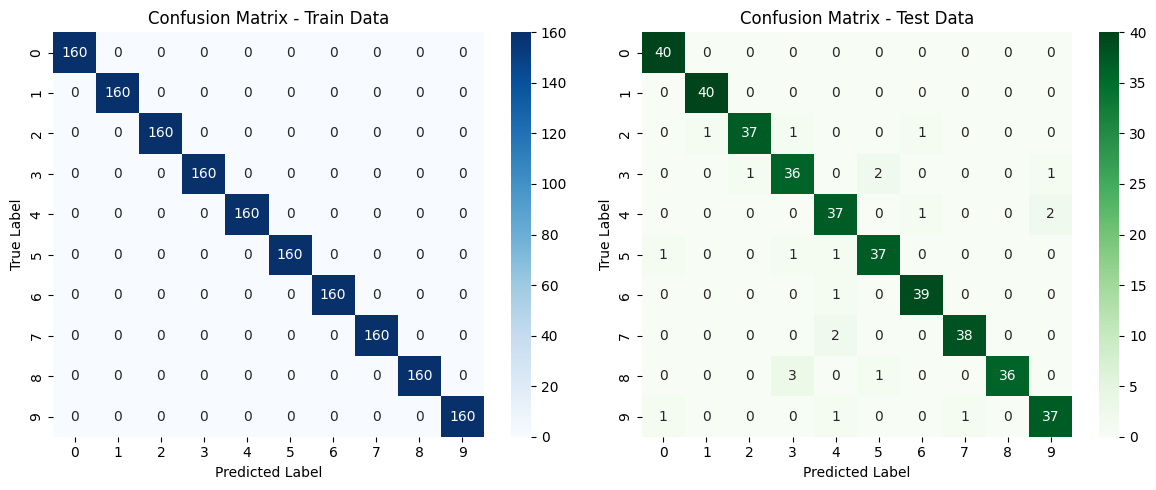

In [28]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_, ax=axes[0])
axes[0].set_title("Confusion Matrix - Train Data")
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")

sns.heatmap(cm_test, annot=True, fmt='d', cmap='Greens', xticklabels=model.classes_, yticklabels=model.classes_, ax=axes[1])
axes[1].set_title("Confusion Matrix - Test Data")
axes[1].set_xlabel("Predicted Label")
axes[1].set_ylabel("True Label")

plt.tight_layout()
plt.show()

## Prediksi vs True Label (Random Choice)

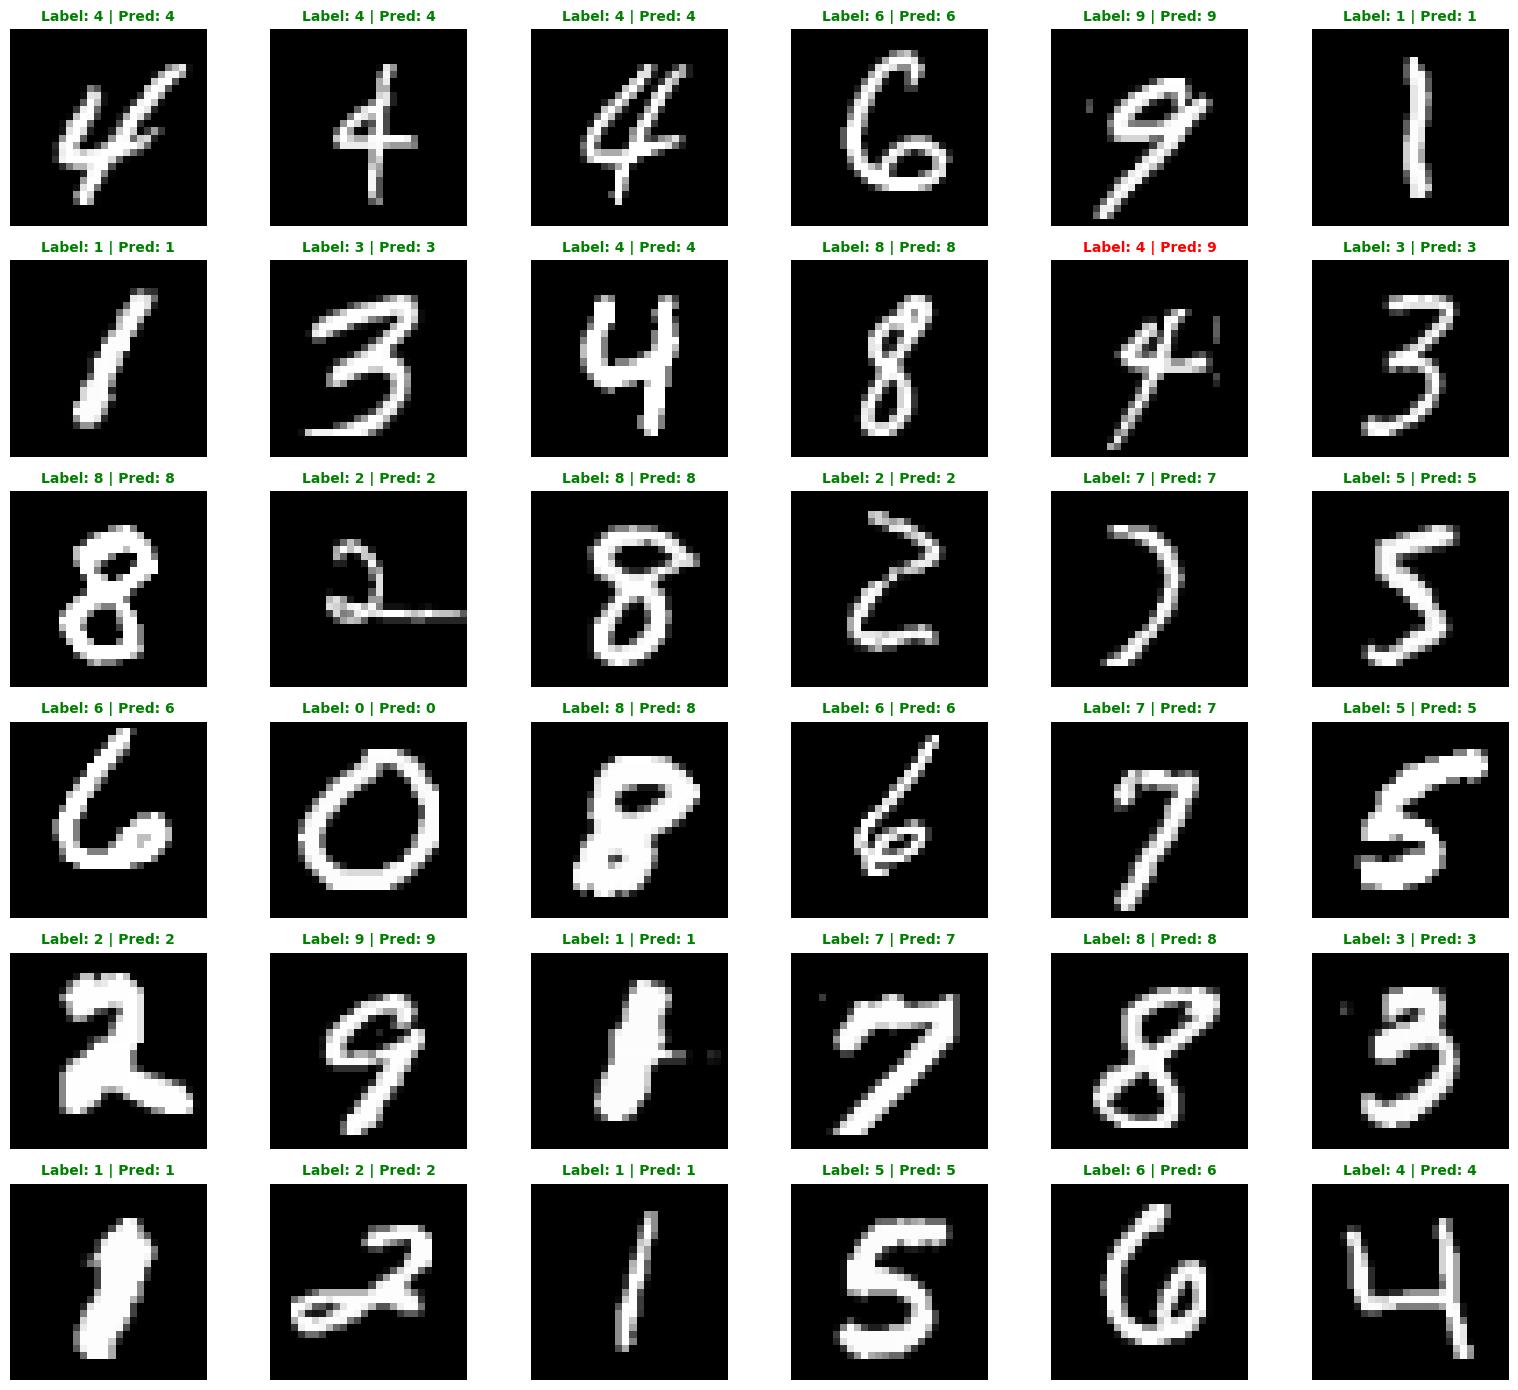

In [22]:
import numpy as np
import matplotlib.pyplot as plt

X_test_np = np.array(X_test)
y_test_np = np.array(y_test)

if len(X_test_np) >= 36:
    idx = np.random.choice(len(X_test_np), size=36, replace=False)
else:
    raise ValueError("Jumlah data dalam X_test kurang dari 36!")

images = X_test_np[idx]
labels = y_test_np[idx]
preds = model.predict(images)

fig, axes = plt.subplots(6, 6, figsize=(16, 14))

for img, label, pred, ax in zip(images, labels, preds, axes.flatten()):
    ax.imshow(img.reshape(28, 28), cmap='gray')

    color = "green" if label == pred else "red"

    ax.set_title(f"Label: {label} | Pred: {pred}", color=color, fontsize=10, fontweight='bold')
    ax.axis('off')

plt.tight_layout()
plt.show()